In [1]:
# current ADAM resnet18 with 200 epochs is 76% accuracy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
from numpy import asarray
import PIL.Image as Image
import torch.nn as nn
import tqdm
import gc

device = "cuda"

torch.cuda.empty_cache()
gc.collect()
        
import torchvision.transforms as transforms
transform = transforms.ToTensor()

In [2]:
patch_size = 16

# get dataset stuffs
import torchvision
from torch.utils.data import DataLoader
from torchvision.models.utils import load_state_dict_from_url

transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset = torchvision.datasets.CIFAR100(root="based", train=False, download=True, transform=transform)

val_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


dataset = torchvision.datasets.CIFAR100(root="based", train=True, download=True, transform=transform)

train_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

0it [00:00, ?it/s]

Extracting based/cifar-100-python.tar.gz to based
Files already downloaded and verified


In [3]:
!pip install vit-pytorch

In [4]:
def testb():
    acc = 0
    total = 0
    for n_, (x, y) in enumerate(val_dataloader):
        x = x.to(device)
        bs = x.shape[0]
        x = x.reshape(bs, 3, 32, 32)
        
        y_hat = v(x) # add encodings?
        for _, i in enumerate(y_hat):
            if i.argmax() == y.to(device)[_]:
                acc +=1
            total +=1
            
    return acc/total

In [5]:
"""
import torch
from vit_pytorch import ViT

# get ViT-B/16 model
""""""
# ViT-L/8
v = ViT(
    image_size = 32,
    patch_size = 8,
    num_classes = 10,
    dim = 1024,
    depth = 24,
    heads = 16,
    mlp_dim = 4096,
    dropout = 0.1,
    emb_dropout = 0.1
)
""""""
# ViT-L/24
v = ViT(
    image_size = 32,
    patch_size = patch_size,
    num_classes = 100,
    dim = 1024,
    depth = 24,
    heads = 16,
    mlp_dim = 4096,
    dropout = 0.1,
    emb_dropout = 0.1
)

#from pytorch_pretrained_vit import ViT
#v = ViT('B_16_imagenet1k', pretrained=True)

v.eval()

# initialize stuffs
losslist_n = []
v = v.to(device)
voptimizer = torch.optim.Adam(v.parameters(), lr=.0001)
import random
import time

timelist_n = []
acc = 0
total = 0
# do loop for baseline
stime = time.time()
for epoch in range(150):
    t = tqdm.tqdm(train_dataloader, position=0, leave=True)
    tloss = 0
    # loop over data
    n = 0
    for (x, y) in t:
        n +=1
        bs = x.shape[0]
        
        # change device to gpu
        x = x.to(device)
        y = y.to(device)
        
        # forward pass
        x = x.reshape(bs, 3, 32, 32)
        f_y_hat = v(x)
        
        # backward pass
        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 100]), y) # nn.ReLU()
        loss.backward()
        tloss += loss
        
        # optimize
        voptimizer.step() 
        voptimizer.zero_grad()
        
        # keep track of this epoch's loss
        t.set_description_str(str(tloss.detach().cpu().numpy()/(n+1))) # 14:.2
        
    # test epoch's accuracy and append it to the list
    l = testb()
    print(l)
    losslist_n.append(l)
    timelist_n.append(time.time() - stime)
    
# 5 = 2 normal
# new 1.8 = 5"""

"\nimport torch\nfrom vit_pytorch import ViT\n\n# get ViT-B/16 model\n\n# ViT-L/8\nv = ViT(\n    image_size = 32,\n    patch_size = 8,\n    num_classes = 10,\n    dim = 1024,\n    depth = 24,\n    heads = 16,\n    mlp_dim = 4096,\n    dropout = 0.1,\n    emb_dropout = 0.1\n)\n\n# ViT-L/24\nv = ViT(\n    image_size = 32,\n    patch_size = patch_size,\n    num_classes = 100,\n    dim = 1024,\n    depth = 24,\n    heads = 16,\n    mlp_dim = 4096,\n    dropout = 0.1,\n    emb_dropout = 0.1\n)\n\n#from pytorch_pretrained_vit import ViT\n#v = ViT('B_16_imagenet1k', pretrained=True)\n\nv.eval()\n\n# initialize stuffs\nlosslist_n = []\nv = v.to(device)\nvoptimizer = torch.optim.Adam(v.parameters(), lr=.0001)\nimport random\nimport time\n\ntimelist_n = []\nacc = 0\ntotal = 0\n# do loop for baseline\nstime = time.time()\nfor epoch in range(150):\n    t = tqdm.tqdm(train_dataloader, position=0, leave=True)\n    tloss = 0\n    # loop over data\n    n = 0\n    for (x, y) in t:\n        n +=1\n     

In [6]:
# load in ViT-b/16 results from the above code ran in previous version, I seperated these two in case the session was terminated and the data would be lost
losslist_n = [0.1125, 0.1571, 0.1903, 0.2109, 0.228, 0.2387, 0.2612, 0.2694, 0.2835, 0.2859, 0.3017, 0.3096, 0.3185, 0.3204, 0.3297, 0.3309, 0.3278, 0.3326, 0.3379, 0.3389, 0.3409, 0.3387, 0.334, 0.3429, 0.3437, 0.3393, 0.3364, 0.3377, 0.3381, 0.3439, 0.341, 0.3435, 0.3317, 0.3375, 0.3349, 0.3372, 0.336, 0.3346, 0.3371, 0.3317, 0.3368, 0.335, 0.3393, 0.3303, 0.3343, 0.3354, 0.3332, 0.3329, 0.3312, 0.3293, 0.3295, 0.3315, 0.3379, 0.33, 0.3372, 0.3286, 0.3262, 0.3315, 0.3326, 0.3345, 0.3262, 0.3346, 0.3333, 0.332, 0.329, 0.3354, 0.3321, 0.3332, 0.3375, 0.3329, 0.3295, 0.3347, 0.3314, 0.3309, 0.3338, 0.3406, 0.3357, 0.3306, 0.3357, 0.3294, 0.3316, 0.3394, 0.3362, 0.3332, 0.3393, 0.3327, 0.3325, 0.3362, 0.3366, 0.3401, 0.3345, 0.3312, 0.3401, 0.3388, 0.3398, 0.3385, 0.3367, 0.3318, 0.3329, 0.3417, 0.3292, 0.3298, 0.3381, 0.3325, 0.3346, 0.3378, 0.3302, 0.3331, 0.3295, 0.3351, 0.3333, 0.3291, 0.3335, 0.3279, 0.3287, 0.333, 0.3425, 0.3347, 0.3407, 0.3328, 0.3295, 0.3368, 0.3395, 0.339, 0.3364, 0.3346, 0.337, 0.3361, 0.3376, 0.3373, 0.3339, 0.3377, 0.3317, 0.3335, 0.3354, 0.3339, 0.3414, 0.3405, 0.336, 0.3417, 0.3351, 0.3399, 0.3379, 0.3372, 0.3364, 0.3353, 0.3361, 0.335, 0.3428, 0.3366]
timelist_n = [109.3909056186676, 219.32841897010803, 330.2239887714386, 440.64938259124756, 550.8723154067993, 661.6802294254303, 772.5191688537598, 883.3227560520172, 993.7188138961792, 1104.4889798164368, 1215.2683954238892, 1326.759610414505, 1438.0419459342957, 1549.3627400398254, 1660.546214580536, 1771.7729749679565, 1882.780452489853, 1994.29349899292, 2106.0024552345276, 2217.4160945415497, 2329.7917895317078, 2441.832129240036, 2553.393031358719, 2665.313306570053, 2778.0282366275787, 2889.8950781822205, 3001.947208881378, 3114.400810956955, 3226.158298969269, 3338.06978392601, 3450.5861191749573, 3562.9199233055115, 3675.7412428855896, 3787.5225081443787, 3899.277026414871, 4012.113894224167, 4124.567809581757, 4236.96032500267, 4348.976878166199, 4461.409229755402, 4572.7497634887695, 4684.044063568115, 4794.418586730957, 4905.882478713989, 5016.90895986557, 5127.557297229767, 5239.191039323807, 5350.314938545227, 5461.749360799789, 5573.6781668663025, 5684.584666013718, 5797.12562251091, 5908.877532720566, 6020.923618078232, 6134.267620801926, 6244.966788291931, 6357.607537269592, 6469.2407484054565, 6581.601187467575, 6696.598705291748, 6808.995381593704, 6922.72673034668, 7035.041161298752, 7148.815472602844, 7261.254725933075, 7374.700086116791, 7489.746748924255, 7602.0384957790375, 7715.768781423569, 7827.583609342575, 7940.510193109512, 8052.863350391388, 8166.350215911865, 8278.529978513718, 8391.860353708267, 8504.166155099869, 8617.677031517029, 8729.86443901062, 8842.071582317352, 8953.977935791016, 9066.054103374481, 9177.962029218674, 9290.754925966263, 9401.391715765, 9513.591609477997, 9626.214242696762, 9738.736839294434, 9851.78499531746, 9965.374804973602, 10076.486709594727, 10189.42933678627, 10302.504204273224, 10414.840611219406, 10527.04118180275, 10637.631758213043, 10750.412248849869, 10863.167299747467, 10976.032071113586, 11089.047140359879, 11202.331527471542, 11314.175335884094, 11426.381892442703, 11539.098245382309, 11651.79485154152, 11765.299384832382, 11876.79697561264, 11989.583955526352, 12103.023235321045, 12216.449891090393, 12329.994505167007, 12440.860508680344, 12553.582862854004, 12666.481213092804, 12779.355063915253, 12893.192817687988, 13003.785947084427, 13116.932809829712, 13230.625923633575, 13344.067232131958, 13457.784182786942, 13569.2050178051, 13683.03580403328, 13796.193817615509, 13909.542282104492, 14019.98284816742, 14133.5642080307, 14246.849434137344, 14359.780198574066, 14473.93077492714, 14584.597780942917, 14697.822397947311, 14810.839767456055, 14924.372515916824, 15035.095371723175, 15148.646799564362, 15263.09439778328, 15376.029863595963, 15490.149483442307, 15601.802489995956, 15714.969693183899, 15828.121228694916, 15941.687116622925, 16051.49700307846, 16164.801974058151, 16277.726762771606, 16390.611603736877, 16501.05613040924, 16614.099994659424, 16727.062110185623, 16840.137110948563]

In [7]:
def test(f):
    acc = 0
    total = 0
    # loop over test set
    for n_, (x, y) in enumerate(val_dataloader):
        bs = x.shape[0]
        x = x.to(device)
        
        # f is how many times ViT loops over data
        for i in range(f):
            x = v(x)
            x = nn.ReLU()(b(x))
            x = x.reshape(bs, 3, 32, 32)
            
        # apply Head
        y_hat = Head(x)
        
        # loop over predicted and see if equal to the ground truth
        for _, i in enumerate(y_hat):
            if i.argmax() == y.to(device)[_]:
                acc +=1
            total +=1
            
    return acc/total

In [8]:
# blank module to replace nn.Softmaxes with
class make_linear(torch.nn.Module):
    def __init__(self):
        super(make_linear, self).__init__()

    def forward(self, x):
        return x

In [9]:
def replace_layers(model, old, new):
    # stolen from stack overflow, replaces all non linearities so that transformers are linear
    for n, module in model.named_children():
        if len(list(module.children())) > 0:
            ## compound module, go inside it
            replace_layers(module, old, new)
            
        if isinstance(module, old):
            ## simple module
            setattr(model, n, new)

In [10]:
###### import torch
from vit_pytorch import ViT

v = ViT(
    image_size = 32,
    patch_size = 16,
    num_classes = 3072,
    dim = 1024,
    depth = 24,
    heads = 16,
    mlp_dim = 4096,
    dropout = 0.1,
    emb_dropout = 0.1
)

#from pytorch_pretrained_vit import ViT
#model = ViT('B_16_imagenet1k', pretrained=True)

v.train()
#v = torch.nn.Sequential(*(list(v.children())[:-1])) # get rid of MLP dim
# MLP dim consists of Layernorm and then activationless FC
#v = torch.nn.Sequential(*(list(v.children()) + [nn.BatchNorm1d(4)])) #
#replace_layers(v, nn.Softmax, make_linear())

losslist_r = []

#Head = torch.nn.Sequential(*(list([ViT(image_size=32, patch_size=32, num_classes=10, dim=768, depth=1, heads=4, mlp_dim=3072)]))) # might want to increase head size bc the ViT is just interpresting patterns this actually makes decision
Head = torch.nn.Sequential(*(list([nn.Flatten(), nn.LayerNorm(3072), nn.Linear(3072, 100)])))
b = nn.BatchNorm1d(3072).to(device)

v = v.to(device)
Head = Head.to(device)

voptimizer = torch.optim.Adam(v.parameters(), lr=.0001)
hoptimizer = torch.optim.Adam(Head.parameters(), lr=.0001)
boptimizer = torch.optim.Adam(b.parameters(), lr=.0001)

import random
import time

timelist_r = []

loops = 2 # might need to reward not having vanishing things, right now problem is prob that numbers get smaller and smaller - actually use Batch norm

acc = 0
total = 0
stime = time.time()
for epoch in range(150):
    t = tqdm.tqdm(train_dataloader, position=0, leave=True)
    tloss = 0

    for n, (x, y) in enumerate(t):
        bs = x.shape[0]
        x = x.to(device)
        #print(x.shape)
        y = y.to(device)
        
        for i in range(loops):
            
            x = v(x)
            x = nn.ReLU()(b(x))
            #print(x.shape)
            x = x.reshape(bs, 3, 32, 32)
            #print(x[0][0][0])
            #print(x.shape)

        f_y_hat = Head(x)
        
        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 100]), y) # nn.ReLU()
        loss.backward()
        tloss += loss

        hoptimizer.step() 
        hoptimizer.zero_grad()
        voptimizer.step() 
        voptimizer.zero_grad()
        boptimizer.step() 
        boptimizer.zero_grad()
        
        t.set_description_str(str(tloss.detach().cpu().numpy()/(n+1))) # 14:.2
    l = test(loops)
    print(l)
    losslist_r.append(l)
    timelist_r.append(time.time() - stime)
        
# do hyperparam search on heads, depth and how many times to recurse

4.223678277463329: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.0832


3.888850620814732: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.1116


3.746339447644292: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.1353


3.650247690628986: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.1486


3.5745531977439415: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.1545


3.5046688780492667: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.1669


3.4387300452407525: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.1773


3.380103909239477: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.175


3.343895114198023: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.1934


3.2976531982421875: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2012


3.2702082419882017: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2006


3.236424971599968: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2104


3.2055623579998405: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2128


3.1844859220543684: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2081


3.1592634551379146: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.2141


3.125125807158801: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2163


3.1166942362882653: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.2165


3.0987271678691006: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.2202


3.0738185960419324: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2298


3.046193025550064: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.2339


3.031034197126116: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2293


3.011843000139509: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.2341


2.986590638452647: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.2417


2.9609972895408165: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.2399


2.9371960698341835: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.2451


2.9174340695750955: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.249


2.8940267757493623: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2526


2.869190449617347: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.2556


2.8443837068518816: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2517


2.8247967155612246: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2655


2.7994739766023597: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.2658


2.776362827845982: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2631


2.7489359330157845: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.2732


2.7280136419802297: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.2742


2.7022141437141265: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2721


2.672090802873884: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.2821


2.6453714176100127: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.284


2.613648083745217: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2849


2.5891457382513554: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.294


2.5529031558912627: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.2935


2.5311117366868623: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.2983


2.501558576311384: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3026


2.472893072634327: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3054


2.4399864041075414: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.312


2.411377420230788: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3101


2.3825636883171235: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3119


2.3503494262695312: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3204


2.3174953849948183: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3166


2.295392873335858: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3174


2.269628719407685: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3217


2.2223728724888394: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.324


2.1891194557657045: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3328


2.158613866689254: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3282


2.121866342972736: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3282


2.08903254294882: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3288


2.057373825384646: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3393


2.016099268076371: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3327


1.9720139795420122: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3392


1.9334025480309311: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.339


1.8949662811902104: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.34


1.855366765236368: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.334


1.8062997934769611: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.34


1.7704190624003509: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3394


1.721450494260204: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3472


1.6755290128746811: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3478


1.6236383866290658: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3456


1.5701080633669484: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3425


1.5213834801498725: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3416


1.4698592205436862: 100%|██████████| 196/196 [03:02<00:00,  1.08it/s]


0.3445


1.4107094589544802: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3437


1.3604083937041613: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3477


1.3068421032963966: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3469


1.2448713341537787: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3508


1.1940745918118223: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.343


1.1387772852060747: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3449


1.100296098358777: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3473


1.038271222795759: 100%|██████████| 196/196 [03:02<00:00,  1.08it/s]


0.3543


0.980098412961376: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.355


0.9291101572464924: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3501


0.894239853839485: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3518


0.830712688212492: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3503


0.786764028121014: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3493


0.7339794392488441: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3541


0.6886158378756776: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.348


0.658123794867068: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3472


0.6160881665288186: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3506


0.5845488723443479: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.357


0.5528942808812979: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3502


0.505845712155712: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.351


0.4949731632154815: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3509


0.4731869600257095: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3522


0.45031504728356186: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3545


0.42079314407037227: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3606


0.4027896024742905: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3503


0.3801165989467076: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3507


0.36728337346291057: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3516


0.35528120702626753: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.349


0.3455440754793128: 100%|██████████| 196/196 [03:02<00:00,  1.08it/s]


0.3526


0.3203248977661133: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3496


0.3127567914067482: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3476


0.3021344165412747: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3526


0.3140237380047234: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3566


0.27229972761504506: 100%|██████████| 196/196 [03:02<00:00,  1.08it/s]


0.3504


0.27328035782794563: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3433


0.2582066010455696: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3579


0.26891700588926976: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3529


0.2538497885879205: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3482


0.25510406494140625: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3496


0.25062072520353357: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3521


0.24035578357930087: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3483


0.23446441183284839: 100%|██████████| 196/196 [03:02<00:00,  1.08it/s]


0.3554


0.22719840614163145: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3518


0.22121018779521084: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3471


0.21177897161366988: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3517


0.21537167685372488: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.348


0.21713365827287948: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3503


0.19905502942143655: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.3508


0.19939788506955516: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.356


0.2043399226908781: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3536


0.19742664025754345: 100%|██████████| 196/196 [02:59<00:00,  1.09it/s]


0.3477


0.18291255405970983: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3471


0.18277796920464964: 100%|██████████| 196/196 [03:02<00:00,  1.08it/s]


0.3518


0.1895005362374442: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3535


0.18102599163444674: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.351


0.17606445234649035: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3496


0.1772783629748286: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3568


0.17297524822001553: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3494


0.1672789904536033: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3521


0.17334416447853557: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3594


0.17716396098234216: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3536


0.16788424277792172: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3506


0.16039474643006615: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3551


0.1738097521723533: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3523


0.16111830302647182: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3513


0.1426190843387526: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3546


0.1501380375453404: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3506


0.15931770752887336: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3486


0.15195398914570712: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3514


0.13860109874180385: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.351


0.1496464476293447: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3563


0.14781796202367667: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3485


0.1582213810511998: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3569


0.15018459242217394: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3527


0.14375254572654256: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3601


0.13218536182325713: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3543


0.12679681972581514: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


0.3482


0.13442341162233937: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3476


0.12505878720964705: 100%|██████████| 196/196 [03:00<00:00,  1.08it/s]


0.3553


0.14087610828633212: 100%|██████████| 196/196 [03:01<00:00,  1.08it/s]


0.3597


0.13497364277742346: 100%|██████████| 196/196 [03:00<00:00,  1.09it/s]


0.3577


In [11]:
test(loops)

0.3569

In [12]:
print(losslist_r)
print(timelist_r)

[0.0832, 0.1116, 0.1353, 0.1486, 0.1545, 0.1669, 0.1773, 0.175, 0.1934, 0.2012, 0.2006, 0.2104, 0.2128, 0.2081, 0.2141, 0.2163, 0.2165, 0.2202, 0.2298, 0.2339, 0.2293, 0.2341, 0.2417, 0.2399, 0.2451, 0.249, 0.2526, 0.2556, 0.2517, 0.2655, 0.2658, 0.2631, 0.2732, 0.2742, 0.2721, 0.2821, 0.284, 0.2849, 0.294, 0.2935, 0.2983, 0.3026, 0.3054, 0.312, 0.3101, 0.3119, 0.3204, 0.3166, 0.3174, 0.3217, 0.324, 0.3328, 0.3282, 0.3282, 0.3288, 0.3393, 0.3327, 0.3392, 0.339, 0.34, 0.334, 0.34, 0.3394, 0.3472, 0.3478, 0.3456, 0.3425, 0.3416, 0.3445, 0.3437, 0.3477, 0.3469, 0.3508, 0.343, 0.3449, 0.3473, 0.3543, 0.355, 0.3501, 0.3518, 0.3503, 0.3493, 0.3541, 0.348, 0.3472, 0.3506, 0.357, 0.3502, 0.351, 0.3509, 0.3522, 0.3545, 0.3606, 0.3503, 0.3507, 0.3516, 0.349, 0.3526, 0.3496, 0.3476, 0.3526, 0.3566, 0.3504, 0.3433, 0.3579, 0.3529, 0.3482, 0.3496, 0.3521, 0.3483, 0.3554, 0.3518, 0.3471, 0.3517, 0.348, 0.3503, 0.3508, 0.356, 0.3536, 0.3477, 0.3471, 0.3518, 0.3535, 0.351, 0.3496, 0.3568, 0.3494, 0.35

In [13]:
torch.save(v.state_dict(), "vn")
torch.save(Head.state_dict(), "Hn")
torch.save(voptimizer.state_dict(), "on")
torch.save(hoptimizer.state_dict(), "ohn")

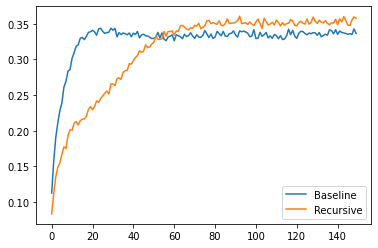

In [14]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(losslist_n))), losslist_n, label="Baseline")
plt.plot(list(range(len(losslist_r))), losslist_r, label="Recursive")
plt.legend()
plt.show()

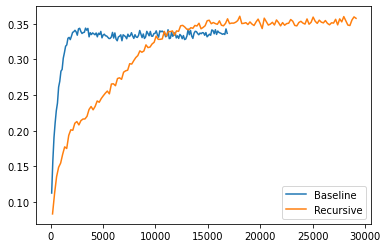

In [15]:
plt.plot(timelist_n, losslist_n, label="Baseline")
plt.plot(timelist_r, losslist_r, label="Recursive")
plt.legend()
plt.show()

In [16]:
print(max(losslist_n))
print(max(losslist_r))

0.3439
0.3606
